In [64]:
import pandas as pd
import numpy as np
from scipy import stats

raw_data = pd.read_csv('meta_data_result.csv')

In [65]:
dep_high = data[data['depression'] >= 22]
dep_low = data[data['depression'] < 22]

dep_high.head()

,log((like/image)*(comment/image)*follower)),Code,Num_comment,Num_like,Num_follower,Num_following,Num_image,Popularity,extraversion,agreeableness,...,narcissism,benign,malicious,perceived_stress,social_phobia,social_interaction_anxiety,generalized_anxiety_disorder,depression,social_media_1,social_media_2
2,2,sns004,441,475,138,158,840,1.612453,25,26,...,46,19,20,31,4,38,16,40,19,30
5,5,sns007,262,4511,147,303,692,2.559679,25,31,...,22,10,5,20,16,22,6,25,12,6
7,7,sns010,147,189,276,286,80,3.078508,31,26,...,43,16,12,22,23,23,7,40,22,21
11,11,sns015,679,5006,337,465,499,3.662789,35,27,...,38,23,14,24,27,27,14,22,21,21
18,18,sns022,756,2369,505,492,266,4.106615,28,34,...,31,22,10,24,5,13,11,26,18,16


In [76]:
idx = list(raw_data)[3:]
idx = idx[:-3] + idx[-2:]
print(idx)

['Num_like', 'Num_follower', 'Num_following', 'Num_image', 'Popularity', 'extraversion', 'agreeableness', 'conscientiousness', 'neuroticism', 'openness', 'social_comparison', 'self_esteem', 'narcissism', 'benign', 'malicious', 'perceived_stress', 'social_phobia', 'social_interaction_anxiety', 'generalized_anxiety_disorder', 'social_media_1', 'social_media_2']


In [77]:
final_result = []

for temp_idx in idx:

    high_group = data[data['depression'] >= 22][temp_idx]
    low_group = data[data['depression'] < 22][temp_idx]
    
    ttest_result = stats.ttest_ind(high_group, low_group)
    temp_result = [temp_idx, ttest_result[0], ttest_result[1]]
    final_result.append(temp_result)
    
    print(temp_idx)
    print("High: " + str(np.mean(high_group)))
    print("low: " + str(np.mean(low_group)))
    print("\n")
    
    
final_result = pd.DataFrame(final_result, columns=['Index', 'T-stat', 'P-value'])
print(final_result)

Num_like
High: 5506.0625
low: 9866.15873015873


Num_follower
High: 250.1875
low: 347.3174603174603


Num_following
High: 297.125
low: 309.22222222222223


Num_image
High: 634.125
low: 596.9206349206349


Popularity
High: 3.086796702375001
low: 3.4452422913333343


extraversion
High: 28.625
low: 27.793650793650794


agreeableness
High: 31.25
low: 33.492063492063494


conscientiousness
High: 27.0
low: 30.88888888888889


neuroticism
High: 30.6875
low: 22.46031746031746


openness
High: 37.375
low: 34.714285714285715


social_comparison
High: 43.4375
low: 38.82539682539682


self_esteem
High: 26.625
low: 32.17460317460318


narcissism
High: 32.5625
low: 27.857142857142858


benign
High: 21.4375
low: 21.793650793650794


malicious
High: 14.125
low: 12.126984126984127


perceived_stress
High: 25.875
low: 15.841269841269842


social_phobia
High: 22.75
low: 17.11111111111111


social_interaction_anxiety
High: 30.4375
low: 24.50793650793651


generalized_anxiety_disorder
High: 11.6875
low: 4.

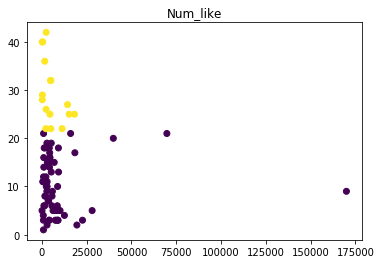

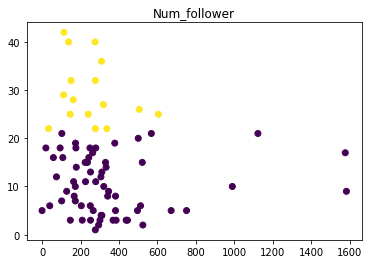

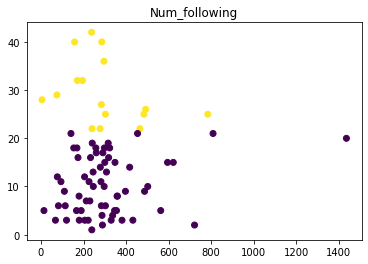

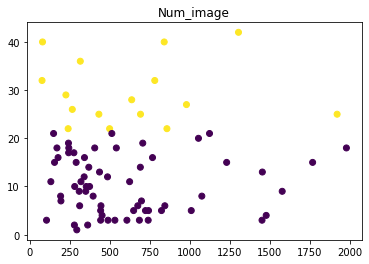

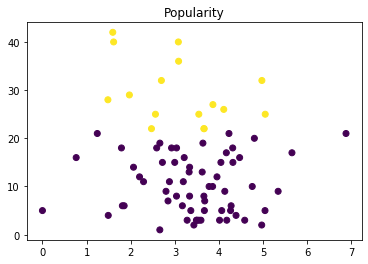

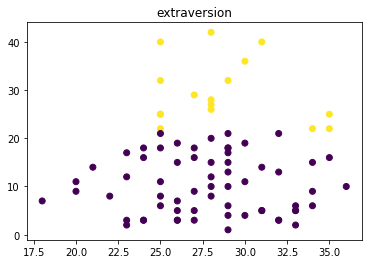

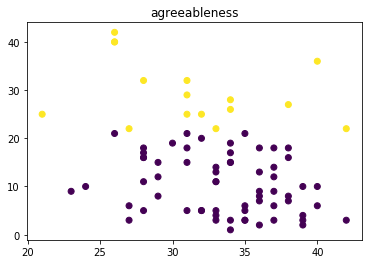

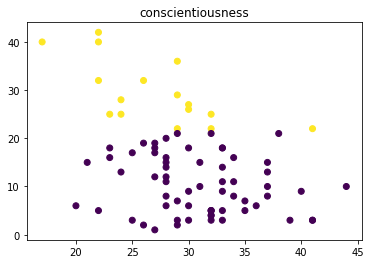

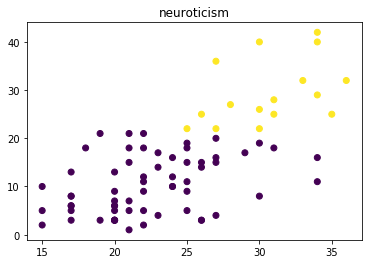

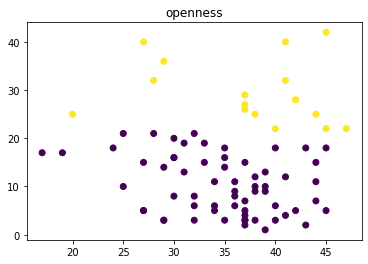

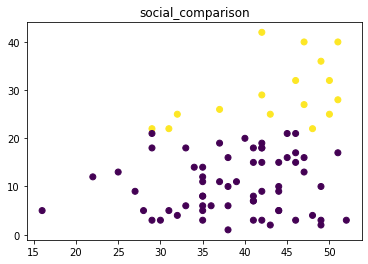

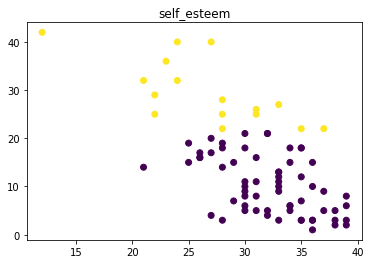

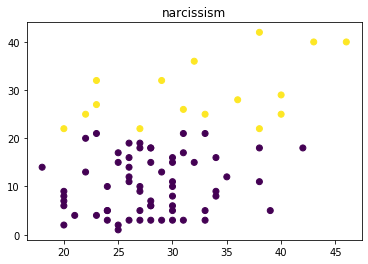

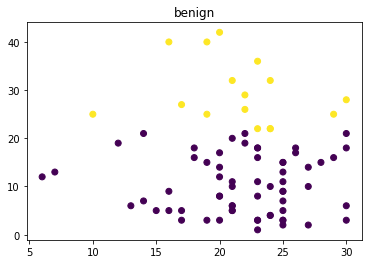

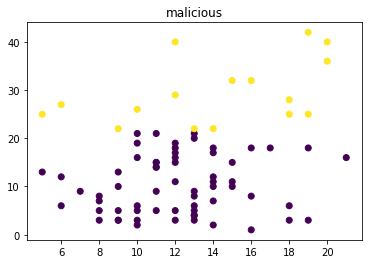

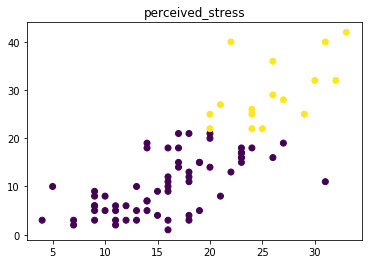

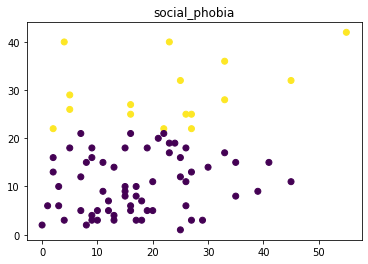

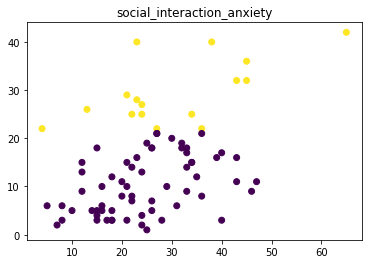

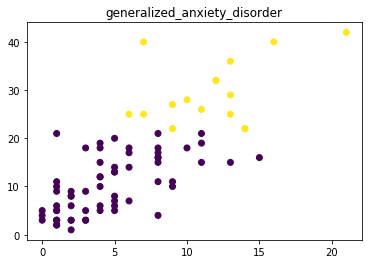

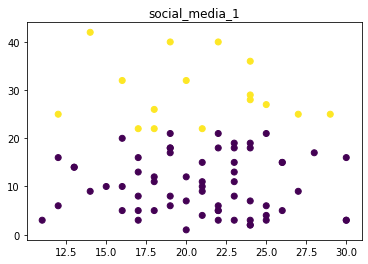

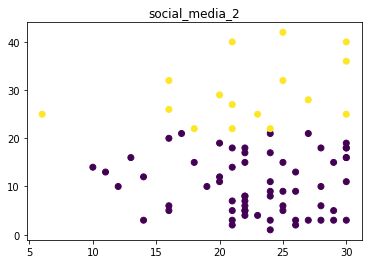

In [78]:
import matplotlib.pyplot as plt

data['col'] = 10

for temp_idx in idx:

    high_group = data[data['depression'] >= 22][temp_idx]
    low_group = data[data['depression'] < 22][temp_idx]
    
    data.loc[data['depression'] >= 22, 'col'] = 100
    
    plt.figure()
    plt.title(temp_idx)
    
    scatter = plt.scatter(data[temp_idx], data['depression'], c = data['col'])
    plt.show()